In [21]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import cmocean
import dask

In [2]:
ds=xr.open_dataset('/gpfsstore/rech/cli/rote001/eORCA36/eORCA_R36_bathymetry_GEBCO_v4.0_test7.13crop.nc')
ds

<xarray.Dataset>
Dimensions:         (y: 10776, x: 12960)
Dimensions without coordinates: y, x
Data variables:
    Bathymetry      (y, x) float32 ...
    Bathymetry_isf  (y, x) float32 ...
    bed             (y, x) float32 ...
    bed0            (y, x) float64 ...
    isf_draft       (y, x) float32 ...
    isf_draft0      (y, x) float32 ...
    mask            (y, x) float32 ...
    nav_lat         (y, x) float32 ...
    nav_lon         (y, x) float32 ...
Attributes:
    Bathymetry_data_source:     
    history:                    Mon May 17 11:19:12 2021: ncks -O -F -d x,1,1...
    NCO:                        4.7.2
    history_of_appended_files:  Mon May 17 11:17:55 2021: Appended file /kara...
    nco_openmp_thread_number:   1

In [3]:
bathy=ds.Bathymetry
lon=ds.nav_lon
lat=ds.nav_lat

In [16]:
bathy.max()

<xarray.DataArray 'Bathymetry' ()>
array(10768.755, dtype=float32)

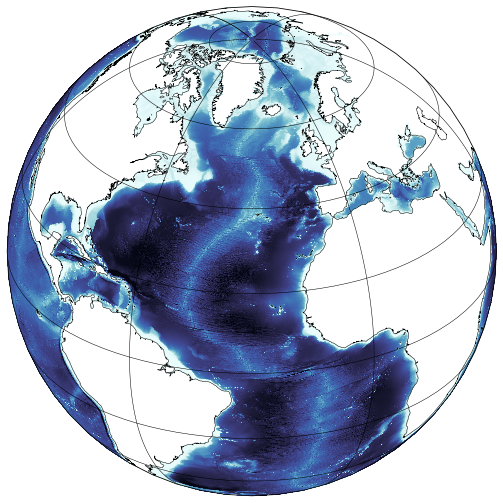

In [58]:
projection=ccrs.Orthographic(central_latitude=30.0, central_longitude=-30.0)
fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
ax.set_global()

#-- add coastal outlines
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
#ax.background_img(name='BM', resolution='low')

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
#gl.xlabel_style = {'size':10}
#gl.ylabel_style = {'size':10}
gl.top_labels   = False
gl.right_labels = False
gl.bottom_labels   = False
gl.left_labels = False

cnf1  = ax.pcolormesh(lon, lat, bathy,
                          cmap=cmocean.cm.ice_r,
                          vmin=0,
                          vmax=6000,
                          shading='flat',
                          transform=ccrs.PlateCarree())

plt.savefig('bathy_eORCA36_atl.png',bbox_inches='tight')

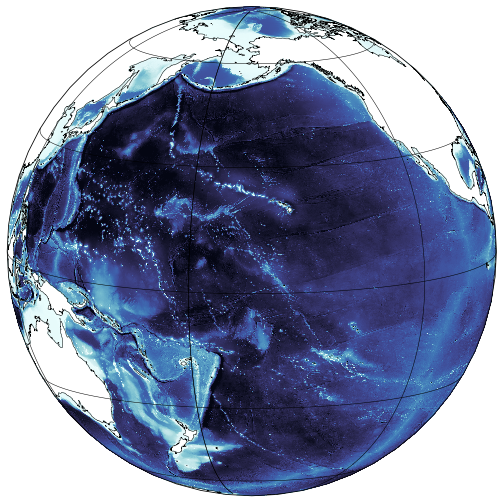

In [59]:
projection=ccrs.Orthographic(central_latitude=10.0, central_longitude=-165.0)
fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
ax.set_global()

#-- add coastal outlines
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
#gl.xlabel_style = {'size':10}
#gl.ylabel_style = {'size':10}
gl.top_labels   = False
gl.right_labels = False
gl.bottom_labels   = False
gl.left_labels = False

cnf1  = ax.pcolormesh(lon, lat, bathy,
                          cmap=cmocean.cm.ice_r,
                          vmin=0,
                          vmax=6000,
                          shading='flat',
                          transform=ccrs.PlateCarree())
plt.savefig('bathy_eORCA36_pac.png',bbox_inches='tight')

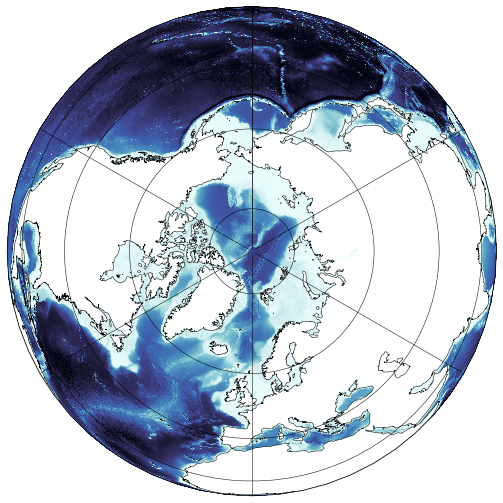

In [60]:
projection=ccrs.Orthographic(central_latitude=90.0, central_longitude=0.0)
fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
ax.set_global()

#-- add coastal outlines
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
#gl.xlabel_style = {'size':10}
#gl.ylabel_style = {'size':10}
gl.top_labels   = False
gl.right_labels = False
gl.bottom_labels   = False
gl.left_labels = False

cnf1  = ax.pcolormesh(lon, lat, bathy,
                          cmap=cmocean.cm.ice_r,
                          vmin=0,
                          vmax=6000,
                          shading='flat',
                          transform=ccrs.PlateCarree())
plt.savefig('bathy_eORCA36_npole.png',bbox_inches='tight')

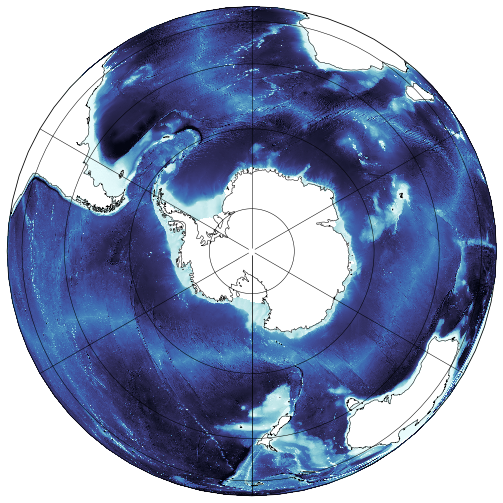

In [61]:
projection=ccrs.Orthographic(central_latitude=-90.0, central_longitude=0.0)
fig, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(10,9))
ax.set_global()

#-- add coastal outlines
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor=cfeature.COLORS['land'])

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='k', zorder=3)
#gl.xlabel_style = {'size':10}
#gl.ylabel_style = {'size':10}
gl.top_labels   = False
gl.right_labels = False
gl.bottom_labels   = False
gl.left_labels = False

cnf1  = ax.pcolormesh(lon, lat, bathy,
                          cmap=cmocean.cm.ice_r,
                          vmin=0,
                          vmax=6000,
                          shading='flat',
                          transform=ccrs.PlateCarree())
plt.savefig('bathy_eORCA36_spole.png',bbox_inches='tight')